In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, KFold
from scipy.optimize import minimize
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import joblib


In [2]:
train = pd.read_csv("../dataset/train.csv")
train.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
oof = train[["Id", "Pawpularity"]].copy()
oof.head()

,Id,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,63
1,0009c66b9439883ba2750fb825e1d7db,42
2,0013fd999caf9a3efe1352ca1b0d937e,28
3,0018df346ac9c1d8413cfcc888ca8246,15
4,001dc955e10590d3ca4673f034feeef2,72


In [4]:
swin = pd.read_csv("../preds/exp_108/oof_pred.csv")
swin = swin[[col for col in swin.keys() if "emb" not in col]]
oof["swin_108_oof_pred"] = swin["oof_pred"]
swin.head()

,Id,Pawpularity,oof_pred
0,././dataset//yolox_x_crop/0007de18844b0dbbb5e1...,63,44.62500
1,././dataset//yolox_x_crop/0009c66b9439883ba275...,42,38.03125
2,././dataset//yolox_x_crop/0013fd999caf9a3efe13...,28,41.90625
3,././dataset//yolox_x_crop/0018df346ac9c1d8413c...,15,55.21875
4,././dataset//yolox_x_crop/001dc955e10590d3ca46...,72,47.34375


In [5]:
swin = pd.read_csv("../preds/exp_109/oof_pred.csv")
swin = swin[[col for col in swin.keys() if "emb" not in col]]
oof["swin_109_oof_pred"] = swin["oof_pred"]
swin.head()

,Id,Pawpularity,oof_pred
0,././dataset//yolox_x_crop/0007de18844b0dbbb5e1...,63,33.34375
1,././dataset//yolox_x_crop/0009c66b9439883ba275...,42,51.78125
2,././dataset//yolox_x_crop/0013fd999caf9a3efe13...,28,41.71875
3,././dataset//yolox_x_crop/0018df346ac9c1d8413c...,15,62.59375
4,././dataset//yolox_x_crop/001dc955e10590d3ca46...,72,40.09375


In [6]:
swin = pd.read_csv("../preds/exp_101/oof_pred.csv")
swin = swin[[col for col in swin.keys() if "emb" not in col]]
oof["swin_101_oof_pred"] = swin["oof_pred"]
swin.head()

,Id,Pawpularity,oof_pred
0,././dataset//center_crop/0007de18844b0dbbb5e1f...,63,46.71875
1,././dataset//center_crop/0009c66b9439883ba2750...,42,48.93750
2,././dataset//center_crop/0013fd999caf9a3efe135...,28,38.12500
3,././dataset//center_crop/0018df346ac9c1d8413cf...,15,62.56250
4,././dataset//center_crop/001dc955e10590d3ca467...,72,46.15625


In [7]:
swin = pd.read_csv("../preds/exp_116/oof_pred.csv")
swin = swin[[col for col in swin.keys() if "emb" not in col]]
oof["swin_116_oof_pred"] = swin["oof_pred"]
swin.head()

,Id,Pawpularity,oof_pred
0,././dataset//yolox_x_crop/0007de18844b0dbbb5e1...,63,44.81250
1,././dataset//yolox_x_crop/0009c66b9439883ba275...,42,38.34375
2,././dataset//yolox_x_crop/0013fd999caf9a3efe13...,28,44.25000
3,././dataset//yolox_x_crop/0018df346ac9c1d8413c...,15,60.40625
4,././dataset//yolox_x_crop/001dc955e10590d3ca46...,72,45.78125


In [8]:
exp_54 = pd.read_csv("../output/exp_054/oof_pred.csv")
oof["exp_54_oof_pred"] = exp_54["xgb_oof_pred"]
exp_54.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63.0,40.842235,40.842235,1,9,0,0.0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42.0,43.824142,43.824142,1,8,0,0.0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28.0,42.880756,42.880756,0,9,0,0.0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15.0,59.793437,59.793437,1,9,0,0.0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72.0,43.703914,43.703914,2,9,0,0.0,1,2,0,0,1,2,4,20,5,30,27


In [9]:
exp_55 = pd.read_csv("../output/exp_055/oof_pred.csv")
oof["exp_55_oof_pred"] = exp_55["xgb_oof_pred"]
exp_55.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred
0,0007de18844b0dbbb5e1f607da0606e0,63.0,46.951347,46.951347
1,0009c66b9439883ba2750fb825e1d7db,42.0,32.981995,32.981995
2,0013fd999caf9a3efe1352ca1b0d937e,28.0,27.411257,27.411257
3,0018df346ac9c1d8413cfcc888ca8246,15.0,67.763334,67.763334
4,001dc955e10590d3ca4673f034feeef2,72.0,45.025595,45.025595


In [10]:
exp_64 = pd.read_csv("../output/exp_064/oof_pred.csv")
oof["exp_64_oof_pred"] = exp_64["ensemble_pred"]
exp_64.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63,0.001896,44.626896,1,9,0,0.0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42,2.724439,40.755689,1,8,0,0.0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28,-0.273249,41.633001,0,9,0,0.0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15,0.323208,55.541958,1,9,0,0.0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72,0.284346,47.628096,2,9,0,0.0,1,2,0,0,1,2,4,20,5,30,27


In [11]:
exp_73 = pd.read_csv("../output/exp_073/oof_pred.csv")
oof["exp_73_oof_pred"] = exp_73["xgb_oof_pred"]
exp_73.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63,40.948711,40.948711,1,9,0,0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42,48.249847,48.249847,1,8,0,0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28,42.798817,42.798817,0,9,0,0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15,65.001781,65.001781,1,9,0,0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72,47.377197,47.377197,2,9,0,0,1,2,0,0,1,2,4,20,5,30,27


In [12]:
exp_74 = pd.read_csv("../output/exp_074/oof_pred.csv")
oof["exp_74_oof_pred"] = exp_74["xgb_oof_pred"]
exp_74.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63.0,40.874770,40.874770,1,9,0,0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42.0,43.676126,43.676126,1,8,0,0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28.0,42.447212,42.447212,0,9,0,0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15.0,59.436595,59.436595,1,9,0,0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72.0,42.881128,42.881128,2,9,0,0,1,2,0,0,1,2,4,20,5,30,27


In [13]:
exp_75 = pd.read_csv("../output/exp_075/oof_pred.csv")
oof["exp_75_oof_pred"] = exp_75["xgb_oof_pred"]
exp_75.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63.0,45.866418,45.866418,1,9,0,0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42.0,35.915610,35.915610,1,8,0,0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28.0,39.388600,39.388600,0,9,0,0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15.0,60.576487,60.576487,1,9,0,0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72.0,49.099457,49.099457,2,9,0,0,1,2,0,0,1,2,4,20,5,30,27


In [14]:
exp_76 = pd.read_csv("../output/exp_076/oof_pred.csv")
oof["exp_76_oof_pred"] = exp_76["ensemble_pred"]
exp_76.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63,-0.485997,44.139003,1,9,0,0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42,-2.116826,35.914424,1,8,0,0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28,-4.910804,36.995446,0,9,0,0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15,0.328150,55.546900,1,9,0,0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72,1.974391,49.318141,2,9,0,0,1,2,0,0,1,2,4,20,5,30,27


In [15]:
exp_78 = pd.read_csv("../output/exp_078/oof_pred.csv")
oof["exp_78_oof_pred"] = exp_78["ensemble_pred"]
exp_78.head()

,Id,Pawpularity,xgb_oof_pred,ensemble_pred,gender,breed,Age_bin,Age_year,MaturitySize_bin,num_dog,num_cat,num_teddy_bear,num_person,num_dog_cat,MaturitySize_binAge_bin_combi,MaturitySize_binbreed_combi,MaturitySize_bingender_combi,breedgender_combi,Age_binbreedgender_combi
0,0007de18844b0dbbb5e1f607da0606e0,63.0,39.959985,39.959985,1,9,0,0,1,3,0,0,1,3,4,20,4,29,26
1,0009c66b9439883ba2750fb825e1d7db,42.0,41.086444,41.086444,1,8,0,0,1,0,1,0,0,1,4,19,4,26,23
2,0013fd999caf9a3efe1352ca1b0d937e,28.0,39.838120,39.838120,0,9,0,0,1,1,0,0,0,1,4,20,3,28,25
3,0018df346ac9c1d8413cfcc888ca8246,15.0,55.740839,55.740839,1,9,0,0,1,1,0,0,0,1,4,20,4,29,26
4,001dc955e10590d3ca4673f034feeef2,72.0,36.287439,36.287439,2,9,0,0,1,2,0,0,1,2,4,20,5,30,27


In [16]:
coorabi = pd.read_csv("../preds/coorabi/coorabi_final_oof.csv")
coorabi.columns = [
    "Id",
    "Pawpularity",
    "coorabi_pred_1",
    "coorabi_pred_2",
    "coorabi_pred_3",
    "coorabi_pred_4",
    "coorabi_pred_5",
    "coorabi_pred_6",
    "coorabi_pred_7",
    "coorabi_pred_8",
    "coorabi_pred_9",
]
coorabi

,Id,Pawpularity,coorabi_pred_1,coorabi_pred_2,coorabi_pred_3,coorabi_pred_4,coorabi_pred_5,coorabi_pred_6,coorabi_pred_7,coorabi_pred_8,coorabi_pred_9
0,0007de18844b0dbbb5e1f607da0606e0,63,45.741117,44.915751,50.775518,50.615021,52.075531,47.491606,55.748005,49.225694,53.555946
1,0009c66b9439883ba2750fb825e1d7db,42,40.360180,43.380165,38.507883,40.228050,47.889439,43.953401,45.498482,35.947308,38.396606
2,0013fd999caf9a3efe1352ca1b0d937e,28,49.068408,43.112633,47.358338,43.776688,45.489590,56.255721,50.546425,46.130409,48.240788
3,0018df346ac9c1d8413cfcc888ca8246,15,62.193938,62.011868,59.992220,63.641327,53.503769,60.512436,60.138859,60.781067,61.528915
4,001dc955e10590d3ca4673f034feeef2,72,40.649188,47.279945,40.444802,41.793631,34.643070,35.359559,46.389931,34.989168,37.218815
...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,15,28.321473,24.980555,28.510020,21.353720,24.635197,29.931558,23.711262,28.517035,26.918476
9908,ffcc8532d76436fc79e50eb2e5238e45,70,32.392694,38.035599,32.659299,32.578522,39.770447,32.202804,40.575798,31.847221,39.879253
9909,ffdf2e8673a1da6fb80342fa3b119a20,20,26.321482,23.958643,25.517472,25.945908,32.167305,26.564563,24.692341,25.935375,26.472851
9910,fff19e2ce11718548fa1c5d039a5192a,20,48.298031,38.243290,38.210068,44.590992,38.670551,40.678403,47.486057,38.635997,46.401489


In [17]:
coorabi2 = pd.read_csv("../preds/coorabi/coorabi_pred_6_7_8_9.csv")
coorabi2.columns = ["Id", "Pawpularity", "fold"] + [f"coorabi_pred_{i}" for i in range(6,10)]
coorabi2

,Id,Pawpularity,fold,coorabi_pred_6,coorabi_pred_7,coorabi_pred_8,coorabi_pred_9
0,0007de18844b0dbbb5e1f607da0606e0,63,2,37.734841,41.128838,45.961661,49.988083
1,0009c66b9439883ba2750fb825e1d7db,42,2,35.773947,35.643730,37.935167,41.766281
2,0013fd999caf9a3efe1352ca1b0d937e,28,4,45.970454,47.460644,42.835507,44.218170
3,0018df346ac9c1d8413cfcc888ca8246,15,0,59.280533,60.587132,59.136100,56.885849
4,001dc955e10590d3ca4673f034feeef2,72,4,37.258942,40.189102,38.395226,40.583611
...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,15,0,27.025029,22.523312,27.555752,23.908243
9908,ffcc8532d76436fc79e50eb2e5238e45,70,1,33.844626,33.939114,33.296164,35.711079
9909,ffdf2e8673a1da6fb80342fa3b119a20,20,0,26.868506,23.066925,26.596717,27.751850
9910,fff19e2ce11718548fa1c5d039a5192a,20,2,39.772711,44.092381,42.263798,44.691341


In [18]:
oof = pd.merge(
    oof,
    coorabi[
        [
            "Id",
            "coorabi_pred_1",
            "coorabi_pred_2",
            "coorabi_pred_3",
            "coorabi_pred_4",
            "coorabi_pred_5",
        ]
    ],
    how="left",
    on="Id",
)
oof = pd.merge(
    oof,
    coorabi2[
        [
            "Id",
            "coorabi_pred_8",
            "coorabi_pred_9",
        ]
    ],
    how="left",
    on="Id",
)

In [19]:
oof

,Id,Pawpularity,swin_108_oof_pred,swin_109_oof_pred,swin_101_oof_pred,swin_116_oof_pred,exp_54_oof_pred,exp_55_oof_pred,exp_64_oof_pred,exp_73_oof_pred,...,exp_75_oof_pred,exp_76_oof_pred,exp_78_oof_pred,coorabi_pred_1,coorabi_pred_2,coorabi_pred_3,coorabi_pred_4,coorabi_pred_5,coorabi_pred_8,coorabi_pred_9
0,0007de18844b0dbbb5e1f607da0606e0,63,44.625000,33.343750,46.718750,44.812500,40.842235,46.951347,44.626896,40.948711,...,45.866418,44.139003,39.959985,45.741117,44.915751,50.775518,50.615021,52.075531,45.961661,49.988083
1,0009c66b9439883ba2750fb825e1d7db,42,38.031250,51.781250,48.937500,38.343750,43.824142,32.981995,40.755689,48.249847,...,35.915610,35.914424,41.086444,40.360180,43.380165,38.507883,40.228050,47.889439,37.935167,41.766281
2,0013fd999caf9a3efe1352ca1b0d937e,28,41.906250,41.718750,38.125000,44.250000,42.880756,27.411257,41.633001,42.798817,...,39.388600,36.995446,39.838120,49.068408,43.112633,47.358338,43.776688,45.489590,42.835507,44.218170
3,0018df346ac9c1d8413cfcc888ca8246,15,55.218750,62.593750,62.562500,60.406250,59.793437,67.763334,55.541958,65.001781,...,60.576487,55.546900,55.740839,62.193938,62.011868,59.992220,63.641327,53.503769,59.136100,56.885849
4,001dc955e10590d3ca4673f034feeef2,72,47.343750,40.093750,46.156250,45.781250,43.703914,45.025595,47.628096,47.377197,...,49.099457,49.318141,36.287439,40.649188,47.279945,40.444802,41.793631,34.643070,38.395226,40.583611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,15,18.218750,27.125000,23.718750,23.421875,26.426089,2.928351,18.592061,26.555977,...,19.218102,10.260427,27.229148,28.321473,24.980555,28.510020,21.353720,24.635197,27.555752,23.908243
9908,ffcc8532d76436fc79e50eb2e5238e45,70,31.640625,32.968750,35.093750,42.125000,34.279713,27.351284,32.229646,33.386902,...,34.931436,31.237359,37.662420,32.392694,38.035599,32.659299,32.578522,39.770447,33.296164,35.711079
9909,ffdf2e8673a1da6fb80342fa3b119a20,20,24.703125,27.828125,26.421875,25.437500,30.327690,19.122590,24.915415,30.771049,...,23.899917,16.961568,33.332077,26.321482,23.958643,25.517472,25.945908,32.167305,26.596717,27.751850
9910,fff19e2ce11718548fa1c5d039a5192a,20,41.437500,41.593750,44.437500,46.718750,37.398914,57.040248,41.052848,38.201595,...,37.110162,36.590052,38.144171,48.298031,38.243290,38.210068,44.590992,38.670551,42.263798,44.691341


In [20]:
COLS_PRED = [
    "swin_108_oof_pred",
    "swin_109_oof_pred",
    "swin_101_oof_pred",
    "swin_116_oof_pred",
    "exp_54_oof_pred",
    #     "exp_55_oof_pred",
    "exp_64_oof_pred",
    #     "exp_73_oof_pred",
    #     "exp_74_oof_pred",
    #     "exp_75_oof_pred",
    #     "exp_76_oof_pred",
    #     "exp_78_oof_pred",
    "coorabi_pred_1",
    "coorabi_pred_2",
    "coorabi_pred_3",
    "coorabi_pred_4",
    "coorabi_pred_5",
#     "coorabi_pred_6",
#     "coorabi_pred_7",
    "coorabi_pred_8",
    "coorabi_pred_9",
]

In [21]:
COLS_PRED

['swin_108_oof_pred',
 'swin_109_oof_pred',
 'swin_101_oof_pred',
 'swin_116_oof_pred',
 'exp_54_oof_pred',
 'exp_64_oof_pred',
 'coorabi_pred_1',
 'coorabi_pred_2',
 'coorabi_pred_3',
 'coorabi_pred_4',
 'coorabi_pred_5',
 'coorabi_pred_8',
 'coorabi_pred_9']

<AxesSubplot:>

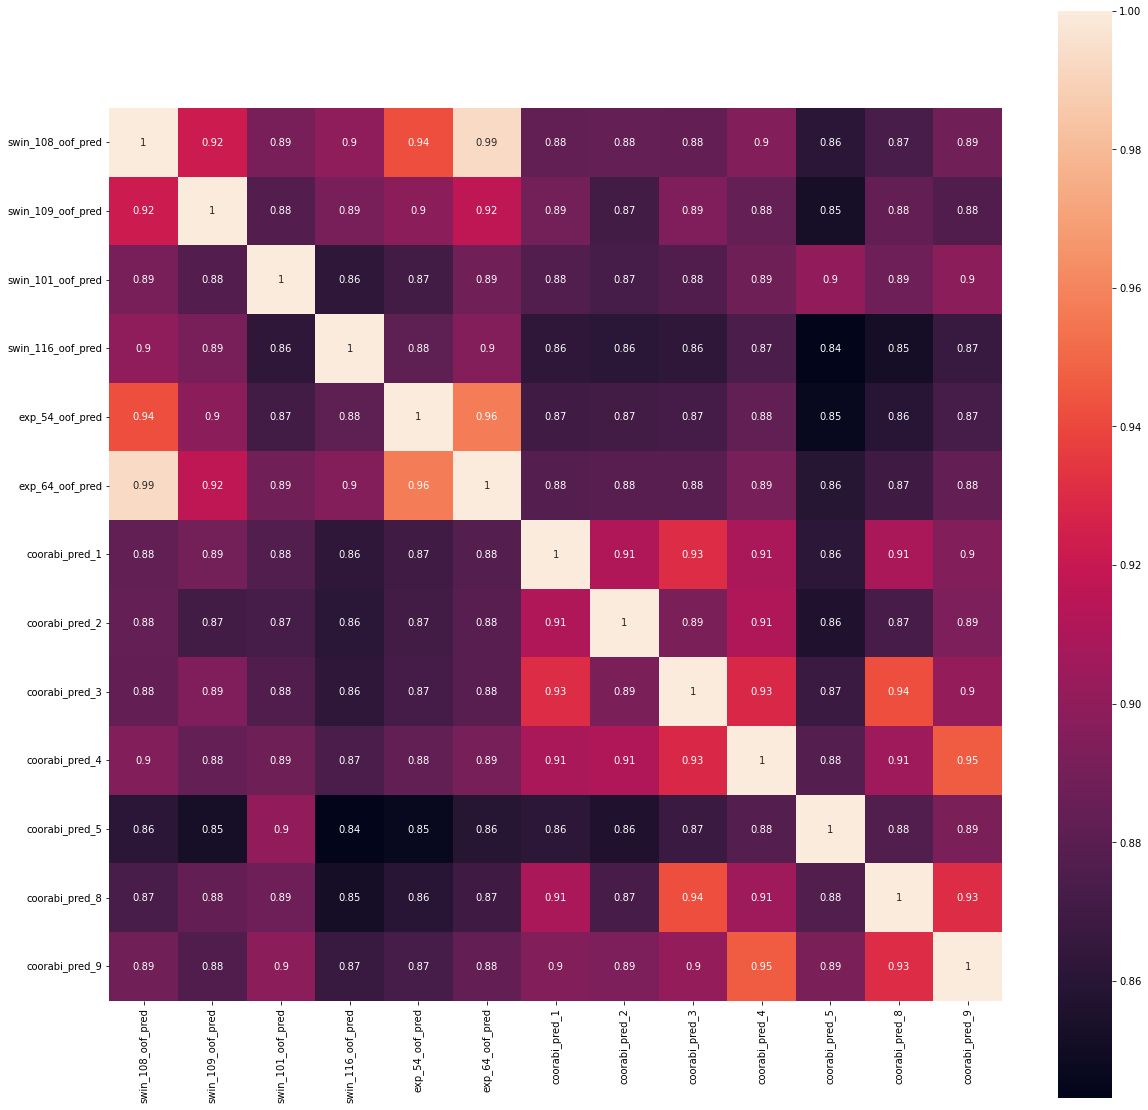

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

sns.heatmap(oof[COLS_PRED].corr(), square=True, annot=True)

In [23]:
for col in COLS_PRED:
    print(f"{col}", np.sqrt(np.mean((oof["Pawpularity"] - oof[col])**2)))

swin_108_oof_pred 17.60629206705017
swin_109_oof_pred 17.60756103033429
swin_101_oof_pred 17.529659175568003
swin_116_oof_pred 17.6178711561578
exp_54_oof_pred 17.49997143752996
exp_64_oof_pred 17.5139126782348
coorabi_pred_1 17.54971987478294
coorabi_pred_2 17.603979661360682
coorabi_pred_3 17.52238998576875
coorabi_pred_4 17.564406221006507
coorabi_pred_5 17.72525234324687
coorabi_pred_8 17.552797130704082
coorabi_pred_9 17.635765601809606


In [24]:
oof[COLS_PRED] /= len(COLS_PRED)
# oof

In [25]:
def validate(oof):
    return np.sqrt(np.mean((oof["Pawpularity"] - oof[COLS_PRED].sum(axis="columns"))**2))

In [26]:
LOOP = 100
NUM_FOLDS = 10

In [27]:
# ==============================================================================
# minimize
# ==============================================================================

weights = np.ones(len(COLS_PRED))


def get_score(weights: np.array, train_idx):
    oof_ = oof.copy()

    for i, c in enumerate(COLS_PRED):
        oof_.loc[train_idx, c] *= weights[i]

    return validate(oof_)


def calc_weight(train_idx):
    res = minimize(get_score, weights, args=(train_idx), method="Nelder-Mead", tol=1e-6)

    print("score:", res.fun)
    print("weights:", res.x)
    return res.x


weights_list = []
for i in tqdm(range(LOOP)):
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=i)
    result = joblib.Parallel(n_jobs=-1)(
        joblib.delayed(calc_weight)(train_idx)
        for fold, (train_idx, valid_idx) in enumerate(kf.split(oof))
    )
    weights_list.append(result)


print(np.array(weights_list).mean(0))

/tmp/ipykernel_2623819/1399225067.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(LOOP)):


  0%|          | 0/100 [00:00<?, ?it/s]

score: 17.14081087085904
weights: [-8.985273    0.72598673  2.16507994  2.0141613   0.2142433  10.05770432
  1.28156129  0.9331999   0.23064155  1.9609447   1.42768058  1.6147793
 -0.72877036]
score: 17.13131351847594
weights: [-10.01610349   1.05208231   2.1418765    1.97351656  -0.0658885
  11.52235317   0.13395491   1.78445374   0.32670391   2.03009765
   1.33779744   1.84399642  -1.09319327]
score: 17.1369202086418
weights: [-9.1086138   1.0519279   1.95752285  2.39598417  0.53984812  9.62924158
  1.42616277  0.60029619 -0.29679308  2.29172675  0.84356156  2.20418977
 -0.53183326]
score: 17.133471232114893
weights: [-10.6895361    1.13946081   2.30903391   1.81564419   0.06694514
  11.88408322   1.17194023   1.07821581   0.03040578   1.79318123
   1.06815348   1.71374799  -0.45371944]
score: 17.1295107673109
weights: [-10.43780488   0.49141058   2.03320086   1.58128372   0.78072583
  11.80080171   1.32178183   1.19872413   0.63923138   1.39459516
   1.36394287   1.21338549  -0.4477

weights: score: 17.131744769142042
weights: [-9.51090674  0.83688757  1.99146259  2.00436616  0.79793741 10.17784857
  1.09258661  0.97978373  0.39266629  1.88975711  1.25290992  1.81020401
 -0.75975189]
score: 17.127458470153574
weights: [-10.09938076   0.15053869   2.35776786   1.98147683   0.445225
  11.31193586   0.98839628   0.94833117   0.2532124    2.11620194
   1.60577923   1.73608024  -0.86962568]
score: 17.127041651922454
weights: [-1.09268091e+01  1.00537753e+00  2.26528254e+00  2.06860420e+00
  2.91187564e-03  1.20531374e+01  5.35592359e-01  1.62558435e+00
 -2.20030447e-01  1.90835141e+00  1.05299287e+00  2.20876269e+00
 -6.11970886e-01]
score: 17.14904515739121
weights: [-6.67643745  1.04472032  1.64171306  1.21798852  1.30108081  7.48582858
  1.02889888  1.24042938  1.82888317  0.32060166  1.77740803 -0.22617654
  1.00380466]
score: 17.133047438412028
weights: [-9.76910349  0.7475299   1.68795458  1.92218653  0.66332633 10.52301097
  0.88317794  1.12674558  1.1663101   1.

weights: score: 17.135620578301324
weights: [-9.69244819  0.68272297  2.26158702  1.77485245  0.22743712 10.97992796
  0.87684846  1.48076707  1.0803999   1.41213781  1.35299709  0.95358303
 -0.43393241]
score: 17.124927129604398
weights: [-11.14536895   0.71201412   2.39373429   2.05115848   0.13583308
  12.22247208   0.8465921    1.29422658   0.61516183   1.4319265
   1.39724133   1.6235666   -0.65201987]
score: 17.142306404434137
weights: [-7.86214739  0.47349023  2.19712167  1.86923411  0.75778494  9.03674416
  1.02025889  0.92147912  0.47835346  1.84785648  1.56204152  1.44419576
 -0.78930674]
score: 17.133472536500598
weights: [-9.70040566  0.60511214  2.12745041  2.0209915   0.57639057 10.74978887
  0.98119864  1.22430888  0.45636029  1.89628572  1.36624559  1.43142392
 -0.80385059]
score: 17.13091291058411
weights: [-10.20234225   0.69687322   2.36592456   1.65979508  -0.05328265
  11.86627912   0.927076     1.01865263   1.33331125   1.58787633
   1.2607618    0.81773409  -0.27

weights: score: 17.134474213071044
weights: [-9.84350862  0.89251     2.1586789   1.88223222  0.42363756 10.60427536
  0.98838743  1.03483222  0.27882843  1.91659245  1.42307932  1.73339159
 -0.55590754]
score: 17.13294858538106
weights: [-10.52997544   0.90299064   2.33816277   1.63491899   0.06403799
  12.13209742   1.16200552   0.67256172   1.19464367   1.56988533
   1.06849611   0.77809933  -0.02858622]
score: 17.126930751360092
weights: [-9.84706426  0.82388908  2.51292474  1.79654627  0.4421017  11.2898805
  1.05999112  0.66169082  0.74279229  1.48687213  1.50547409  1.47114032
 -0.98770038]
score: 17.132808175036136
weights: [-9.09174201e+00  8.58709909e-01  2.53442457e+00  2.24520398e+00
  4.96194520e-01  9.89639815e+00  1.50703266e+00  7.67222596e-01
  5.23442010e-04  2.31646088e+00  9.47371020e-01  1.64536993e+00
 -1.17928420e+00]
score: 17.13616773403068
weights: [-9.64138071  0.64237442  1.9344062   1.8861635   0.5957611  10.93510994
  1.12188033  0.82272489  0.96838832  1.

weights: score: 17.13027773928796
weights: [-10.21583664   0.39759953   2.22908258   1.65750736   0.08034735
  12.20880074   0.5765414    1.01744323   0.80730561   1.81011522
   1.46881785   1.64107664  -0.718686  ]
score: 17.141133011569213
weights: [-8.95291875  1.03663281  2.21242829  1.96548761  0.43660089  9.74217733
  1.65380248  0.53388209  0.2879352   2.1715539   1.08624248  1.44415771
 -0.71751488]
score: 17.131999642475748
weights: [-11.04638834   0.91458038   2.15353121   1.8819007   -0.13542341
  12.42200313   0.70264403   1.35133343   0.94558457   1.75596603
   1.23358336   1.19617365  -0.46932276]
score: 17.123338440332592
weights: [-11.00403987   1.34014765   2.30545838   2.0345849    0.62927984
  11.43651389   1.00056875   1.09859443   0.12394351   2.38603671
   1.33344046   1.48497363  -1.26918789]
score: 17.13819470052275
weights: [-9.76527044  0.86152421  2.07778514  1.8683974  -0.21961854 11.37600889
  1.0473926   1.43382883  0.69655295  1.46644177  1.24864536  1.50

weights: score: 17.126530742392827
weights: [-10.94083006   1.08694259   2.68605163   2.10470469  -0.43098279
  12.10826826   1.03201143   1.13398921   0.31372286   1.79539954
   1.31192191   1.22111844  -0.47789436]
score: 17.12966135885639
weights: [-10.26529896   0.64192377   2.21865362   1.9251208    0.50962244
  11.30671532   1.10953961   1.06357119   0.2747156    1.60130214
   1.60907548   1.48671669  -0.55387913]
score: 17.14161432078696
weights: [-8.71885793  1.07545946  2.35558863  1.49948419  0.3694991   9.94859544
  0.74805973  1.04014824  0.31507186  1.55306425  1.2568963   2.01693141
 -0.47553592]
score: 17.12832213818751
weights: [-10.19038758   0.54444054   1.91926535   1.87229847  -0.15547442
  11.90770134   0.83949118   1.31395035   0.76514257   2.04831185
   1.86704061   1.36088347  -1.14585403]
score: 17.13971592613927
weights: [-8.54609029e+00  4.70302456e-01  2.29456410e+00  2.19047743e+00
 -8.37829204e-05  1.05309997e+01  4.60048988e-01  8.10092565e-01
  3.0235840

score: 17.13434388680808
weights: [-9.15168223  0.9162699   1.97266625  1.7651657   0.85862289 10.36031688
  0.74202457  0.80456873  0.42182847  2.39431457  1.46639504  1.76710308
 -1.36291258]
score: 17.143502170610006
weights: [-8.40095247  1.12978336  1.89166046  1.74781667  0.58783631  9.64976599
  0.62508575  1.50508206  1.50143495  0.81158331  1.26272908  0.40616522
  0.28536818]
score: 17.135793330645793
weights: [-9.68567263  0.98001007  2.18378917  2.02749843 -0.03186928 11.01763344
  0.71774989  1.36402943  0.56759854  1.94444851  1.14977877  1.40536415
 -0.65209177]
score: 17.136504164012763
weights: [-8.45337945  0.54205923  2.0116234   2.1502616   1.46372924  9.12414568
  0.84112382  0.82722024  1.27951431  1.34475669  1.30210628  0.45121597
  0.07908148]
score: 17.135891783313376
weights: [-9.27479805  0.73886328  2.09143636  1.88009888  0.80676577  9.53349101
  1.19819449  1.44124019  0.0362472   2.03698182  1.09629859  1.99352695
 -0.62677245]
score: 17.13340176089779
w

weights: score: 17.132514786354392
weights: [-9.73777399  0.45397357  2.10391194  1.98159515  0.47081433 10.84497593
  1.45654125  1.00371631  0.12461187  2.11029667  1.4436216   1.30953095
 -0.61281979]
score: 17.12960585054136
weights: [-9.46867517  0.49485028  2.21100746  2.49567854  0.75793936 10.31859174
  0.64408716  1.30200336  0.25319203  1.87280421  1.21253563  1.82543006
 -0.96022671]
score: 17.13681999179452
weights: [-7.88979705  0.33156079  2.43149574  2.15526219  1.20056909  8.34735345
  1.19463596  0.93921621  0.63903052  1.17957719  1.48917825  1.02431407
 -0.102394  ]
score: 17.12962631474794
weights: [-8.8398913   0.68614275  2.94983127  1.76355159  0.46169934 10.43400005
  0.10851899  1.41201733  0.66905749  1.59969204  0.70944383  2.1892733
 -1.09424272]
score: 17.1428184803957
weights: [-8.35014272  0.7511698   2.05773512  1.94842789  0.22090038  9.61650809
  1.55807161  0.58272271  0.84183951  1.32474017  1.19351327  1.46512025
 -0.23114251]
score: 17.135316792869

weights: score: 17.13548446019456
weights: [-7.59682853  1.33119971  2.16712066  1.78950744  1.71387081  7.91245579
 -0.11853056  0.56769155  2.13193493  0.83243727  1.07882194  1.05016192
  0.17231941]
score: 17.13708067455264
weights: [-8.67579908  1.38084017  2.2432649   1.25669113  1.11365403  8.81642708
  0.7837631   1.09243419  0.73753933  1.78479825  1.59924495  1.68946683
 -0.84891885]
score: 17.138328979659953
weights: [-7.10197551  0.84913423  2.09317364  1.54419368  1.62110633  7.53772967
  0.56578723  1.0843434  -0.3907894   2.90033585  1.55354772  2.20244763
 -1.48387438]
score: 17.12710264734605
weights: [-11.11771673   0.81566137   2.10512674   1.93641421  -0.09215654
  12.64761739   0.44892797   1.53000755   0.91164581   1.1623021
   1.38032076   1.66911604  -0.43885519]
score: 17.12860347362641
weights: [-9.60322115  1.58915991  2.542732    2.03613022  0.30927334 10.17535673
  0.93549254  1.13803144  0.11814969  1.57668005  1.34141316  1.90079507
 -1.11933063]
score: 1

In [28]:
weight = np.array(weights_list).mean(axis=0).mean(axis=0)
weight

array([-9.35059703,  0.80724435,  2.20850042,  1.93097573,  0.46560812,
       10.42278272,  0.93306788,  1.07929767,  0.45529054,  1.76903119,
        1.34789689,  1.57051523, -0.67957554])

In [29]:
np.array(np.array(weights_list).mean(axis=0)).std(0)

array([0.15693514, 0.03348201, 0.02173486, 0.01729195, 0.04296837,
       0.17439438, 0.03730261, 0.02273842, 0.04749215, 0.0200415 ,
       0.01757714, 0.04340048, 0.0225086 ])

In [30]:
np.sqrt(np.mean((np.dot(oof[COLS_PRED].values, weight) - oof["Pawpularity"])**2))

17.129199594406906

In [31]:
oof["oof_pred"] = np.dot(oof[COLS_PRED].values, weight)

<AxesSubplot:>

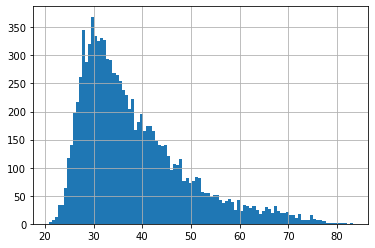

In [32]:
oof["oof_pred"].hist(bins=100)

<AxesSubplot:ylabel='Count'>

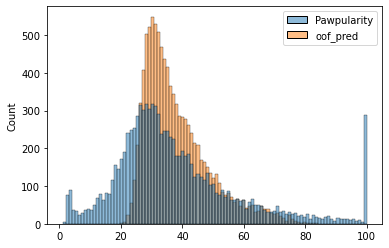

In [33]:
sns.histplot(oof[["Pawpularity", "oof_pred"]], bins=100)

<AxesSubplot:ylabel='Count'>

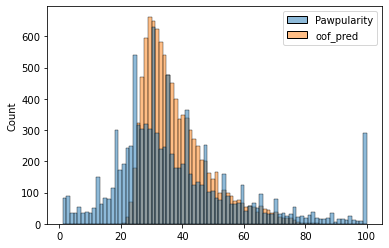

In [34]:
sns.histplot(oof[["Pawpularity", "oof_pred"]])

In [35]:
np.sqrt(np.mean((oof[COLS_PRED].mean(axis=1)*len(COLS_PRED) - oof["Pawpularity"])**2))

17.17854742409664

<AxesSubplot:>

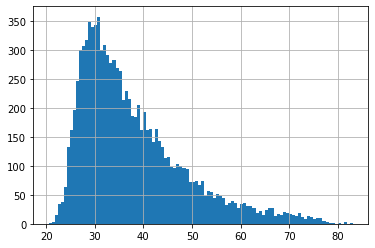

In [36]:
(oof[COLS_PRED].mean(axis=1)*len(COLS_PRED)).hist(bins=100)

In [37]:
dict(zip(COLS_PRED, weight.tolist()))

{'swin_108_oof_pred': -9.35059702761797,
 'swin_109_oof_pred': 0.807244349174199,
 'swin_101_oof_pred': 2.208500423271809,
 'swin_116_oof_pred': 1.9309757346728325,
 'exp_54_oof_pred': 0.46560811863950524,
 'exp_64_oof_pred': 10.42278272148503,
 'coorabi_pred_1': 0.933067884459493,
 'coorabi_pred_2': 1.0792976683075617,
 'coorabi_pred_3': 0.4552905402734452,
 'coorabi_pred_4': 1.769031190090287,
 'coorabi_pred_5': 1.3478968938943412,
 'coorabi_pred_8': 1.5705152312224304,
 'coorabi_pred_9': -0.6795755408777661}

In [38]:
for v in dict(zip(COLS_PRED, weight.tolist())).values():
    print(v, ",")

-9.35059702761797 ,
0.807244349174199 ,
2.208500423271809 ,
1.9309757346728325 ,
0.46560811863950524 ,
10.42278272148503 ,
0.933067884459493 ,
1.0792976683075617 ,
0.4552905402734452 ,
1.769031190090287 ,
1.3478968938943412 ,
1.5705152312224304 ,
-0.6795755408777661 ,
[-10.30741324   0.92450641   2.5999032    1.70725023   0.62754557
  11.09421928   0.90238963   1.03090509   0.52160341   1.33428325
   1.2180262    1.32685387  -0.03997924]
score: 17.141261430550152
weights: [-9.25840664  0.85163239  1.98719153  1.96539947  0.18944828 10.6522283
  0.98668307  1.08938601  0.75210714  1.90882573  1.19567107  1.25046337
 -0.63953   ]
score: 17.133993841308712
weights: [-9.83911708  0.71097428  2.11599087  1.98254792  0.3418298  11.08159113
  0.84369389  1.024435    0.27648216  2.19784162  1.42495854  1.64849653
 -0.87584349]
score: 17.13792308278735
weights: [-9.74070246  1.09130744  1.93854174  2.1796493  -0.04115848 10.93028806
  1.32855179  1.07640891  0.48192387  1.8101438   1.05335315  

[-10.62801588   0.90407993   1.98827436   1.74918621   0.32295936
  11.97627837   1.12268721   1.00910461  -0.31297595   2.21653186
   1.30270231   2.2765317   -0.96435645]
score: 17.136031356185843
weights: [-9.52551662  1.01773322  1.92198522  2.05597146  0.15204349 10.93406266
  0.78372208  0.83255233  0.56333361  1.73079558  1.38452454  1.83098266
 -0.69250684]
score: 17.12981956250183
weights: [-10.6616481    0.6666892    2.21794367   1.87324671  -0.53263213
  12.52086286   1.43093199   0.95219273   0.70946385   1.79710843
   1.36860724   1.42253636  -0.81733079]
score: 17.13954396049678
weights: [-9.23120897  0.94560908  2.25891382  1.78772091  0.19211038 10.53705789
  0.84857499  1.31356613  0.67350885  1.48306027  1.18662689  1.59247251
 -0.62808822]
score: 17.13079797810465
weights: [-10.21403036   0.85809343   2.10843157   1.93248904   0.17512728
  11.61688946   0.92209134   1.52423187   0.3959008    1.35340667
   1.53632803   1.32181321  -0.59965398]
score: 17.14036802377697

[-10.08062084   0.40047112   1.94504956   1.92102437   0.48577341
  10.94764179   1.25764877   1.39503584   0.67473717   1.73023778
   1.17478067   1.58219288  -0.48962366]
score: 17.134232948029293
weights: [-9.95487512  0.70150472  2.34902418  1.90716456  0.14003955 11.05836641
  0.95781396  1.38931814  0.65561015  1.72408286  1.01099462  1.33753069
 -0.31262378]
score: 17.13742643802133
weights: [-7.70747567  0.69767401  2.71535648  1.66958282  1.18907816  8.41416517
  0.60624539  1.06882188  0.44659768  1.87118844  1.09733869  1.80553488
 -0.86504073]
score: 17.13522926578706
weights: [-9.76327891  0.41186048  2.11315213  1.89947553  0.38434182 11.26931634
  1.06326748  1.2622103   0.37624419  1.59704286  1.25025648  1.62486024
 -0.53410115]
score: 17.12343251574115
weights: [-10.66047366   1.19277276   1.93296401   2.15919213   0.34011523
  11.45481761   0.71018865   1.01675527   0.54085267   2.13495237
   1.73090658   1.57860215  -1.16907768]
score: 17.136009679559255
weights: [-

score: 17.13470934945448
weights: [-10.15316034   0.58340236   2.3025598    1.86987786  -0.08290923
  11.60871346   1.11911094   1.70316765   0.57220151   1.59514341
   0.79277676   1.47809203  -0.43569837]
score: 17.14234957227271
weights: [-5.73737557  0.51834611  2.11791877  1.88124828  1.11802983  6.36810981
  1.94906066  0.98190658 -1.49411314  2.11640571  1.32043588  2.6867178
 -0.80760955]
score: 17.138664671922474
weights: [-9.11247764  0.79359591  2.21626061  1.53717112  0.85560195 10.08778273
  1.07654351  1.11188975  0.08477724  1.92698063  1.31941759  1.67454155
 -0.63493766]
score: 17.138409466511074
weights: [-9.4574812   1.05063875  2.26924694  1.95945618 -0.23198565 10.78323387
  1.14090958  0.93473093  1.35532799  1.65698421  1.04251145  0.99260995
 -0.54208153]
score: 17.135613119460782
weights: [-9.03464281  0.7735953   2.40251049  1.96585199  0.38949271 10.20044102
  0.308741    1.16884703  0.53572056  1.83065798  1.37070386  1.87364632
 -0.79983897]
score: 17.13603

[-10.5607002    1.11861891   2.14663852   1.98007492  -0.10451053
  12.31689043   0.75837735   0.92743133   0.51898666   1.78250365
   1.73324105   1.04265168  -0.71472944]
score: 17.134858740532856
weights: [-7.37626961  1.17733736  1.80635145  2.08085004  0.95658812  7.98928135
 -0.02589406  2.05457708 -0.34941608  2.47777715  1.37788319  2.37023144
 -1.47979637]
score: 17.133093355350383
weights: [-9.85004220e+00  1.10361933e+00  2.24288635e+00  1.58318651e+00
 -4.43741453e-03  1.11565547e+01  1.24715859e+00  1.01838241e+00
  2.04610507e-01  1.70279731e+00  1.65317705e+00  1.63521236e+00
 -7.07265692e-01]
score: 17.13082525062301
weights: [-9.37893667  0.9759193   1.64035585  1.90493298  1.42746222  9.66072032
  0.93146322  0.20657653  0.8462224   2.11151045  1.91557485  1.33154677
 -0.62773103]
score: 17.139395166566683
weights: [-4.92209457  1.13361048  2.56923277  2.30164588  2.17372947  4.19741834
  0.49440629  0.15647608  1.36286565  1.39601705  1.39863505  0.51796136
  0.27687

weights: [-7.95767158  1.06051893  2.44289376  1.56455531  0.91983054  8.45851826
  1.73416285  0.69399773 -1.13381144  3.15803027  1.10327795  2.56028886
 -1.59121096]
score: 17.130358066251862
weights: [-10.35896125   1.19053105   1.99168191   2.05023643   0.13294446
  11.89142284   0.99738739   0.52639089   0.35584623   2.33986207
   1.30695862   1.59859318  -1.09323736]
score: 17.135643741174757
weights: [-9.90300556  0.8698012   1.64287209  1.95120561  0.97857407 10.73832442
  0.76122379  1.11917762  0.37207764  1.59651278  1.53577156  1.59916835
 -0.33635264]
score: 17.13453371302368
weights: [-9.48142984  0.57174478  2.24223304  1.84032366  0.15782894 11.09342244
  0.76346368  1.07810379  0.60508396  1.71440184  1.42769913  1.73399139
 -0.76912332]
score: 17.13131937266795
weights: [-7.66840351  0.81551712  1.61217436  2.38439794  1.59050351  7.35615738
  1.189988    1.1997273  -0.81224152  2.6888109   1.67891013  2.53309366
 -1.5882673 ]
score: 17.125704032299492
weights: [-10.

[-9.15366506  0.19663453  2.04675492  2.21059296 -0.13376755 10.89811268
  1.63177092  1.38013125  0.19379387  1.14241187  1.47571703  1.35675334
 -0.3035185 ]
score: 17.134145645371607
weights: [-9.7758855   0.8147843   1.83494152  1.76086582  0.70627716 11.18083486
  1.30563306  0.67858935  0.63943841  1.18105028  1.6650985   1.20849874
 -0.28852773]
score: 17.134278322353513
weights: [-8.90105675  1.18672155  2.20883682  1.64856157  0.56151048  9.61083409
  0.55434918  1.09232948  0.21904059  2.7140598   1.55334272  2.17267163
 -1.61980198]
score: 17.133306911782917
weights: [-10.46669027   0.84241791   2.14834547   1.78913886   0.214727
  11.51879361   1.07717694   1.05596684   0.69841078   1.36032354
   1.51988437   1.35095295  -0.18830198]
score: 17.13488638911077
weights: [-7.58559326  0.95037016  2.2238719   1.89714996  1.42049265  8.25005883
 -0.13353732  1.46882521 -0.14000964  1.8867561   1.44421029  1.70461178
 -0.37290245]
score: 17.135134867704483
weights: [-9.36237564  0